In [7]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('building-permits.csv')

C:\Users\Mike\anaconda3\envs\build\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1,49,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


First I will create a Series I will be using to look at this dataset as a whole, then drop many columns for the dataset I will be using after

In [9]:
col = df.columns
print(col.to_list())

['ID', 'PERMIT#', 'PERMIT_TYPE', 'REVIEW_TYPE', 'APPLICATION_START_DATE', 'ISSUE_DATE', 'PROCESSING_TIME', 'STREET_NUMBER', 'STREET DIRECTION', 'STREET_NAME', 'SUFFIX', 'WORK_DESCRIPTION', 'BUILDING_FEE_PAID', 'ZONING_FEE_PAID', 'OTHER_FEE_PAID', 'SUBTOTAL_PAID', 'BUILDING_FEE_UNPAID', 'ZONING_FEE_UNPAID', 'OTHER_FEE_UNPAID', 'SUBTOTAL_UNPAID', 'BUILDING_FEE_WAIVED', 'ZONING_FEE_WAIVED', 'OTHER_FEE_WAIVED', 'SUBTOTAL_WAIVED', 'TOTAL_FEE', 'CONTACT_1_TYPE', 'CONTACT_1_NAME', 'CONTACT_1_CITY', 'CONTACT_1_STATE', 'CONTACT_1_ZIPCODE', 'CONTACT_2_TYPE', 'CONTACT_2_NAME', 'CONTACT_2_CITY', 'CONTACT_2_STATE', 'CONTACT_2_ZIPCODE', 'CONTACT_3_TYPE', 'CONTACT_3_NAME', 'CONTACT_3_CITY', 'CONTACT_3_STATE', 'CONTACT_3_ZIPCODE', 'CONTACT_4_TYPE', 'CONTACT_4_NAME', 'CONTACT_4_CITY', 'CONTACT_4_STATE', 'CONTACT_4_ZIPCODE', 'CONTACT_5_TYPE', 'CONTACT_5_NAME', 'CONTACT_5_CITY', 'CONTACT_5_STATE', 'CONTACT_5_ZIPCODE', 'CONTACT_6_TYPE', 'CONTACT_6_NAME', 'CONTACT_6_CITY', 'CONTACT_6_STATE', 'CONTACT_6_ZIP

In [10]:
df = df.drop(columns=['ID', 'PERMIT#', 'ISSUE_DATE','STREET_NUMBER', 'STREET DIRECTION', 'STREET_NAME', 'SUFFIX', 'WORK_DESCRIPTION', 'BUILDING_FEE_PAID', 'ZONING_FEE_PAID', 'OTHER_FEE_PAID', 'SUBTOTAL_PAID', 'BUILDING_FEE_UNPAID', 'ZONING_FEE_UNPAID', 'OTHER_FEE_UNPAID', 'SUBTOTAL_UNPAID', 'BUILDING_FEE_WAIVED', 'ZONING_FEE_WAIVED', 'OTHER_FEE_WAIVED', 'SUBTOTAL_WAIVED', 'TOTAL_FEE', 'CONTACT_1_TYPE', 'CONTACT_1_NAME', 'CONTACT_1_CITY', 'CONTACT_1_STATE', 'CONTACT_1_ZIPCODE', 'CONTACT_2_TYPE', 'CONTACT_2_NAME', 'CONTACT_2_CITY', 'CONTACT_2_STATE', 'CONTACT_2_ZIPCODE', 'CONTACT_3_TYPE', 'CONTACT_3_NAME', 'CONTACT_3_CITY', 'CONTACT_3_STATE', 'CONTACT_3_ZIPCODE', 'CONTACT_4_TYPE', 'CONTACT_4_NAME', 'CONTACT_4_CITY', 'CONTACT_4_STATE', 'CONTACT_4_ZIPCODE', 'CONTACT_5_TYPE', 'CONTACT_5_NAME', 'CONTACT_5_CITY', 'CONTACT_5_STATE', 'CONTACT_5_ZIPCODE', 'CONTACT_6_TYPE', 'CONTACT_6_NAME', 'CONTACT_6_CITY', 'CONTACT_6_STATE', 'CONTACT_6_ZIPCODE', 'CONTACT_7_TYPE', 'CONTACT_7_NAME', 'CONTACT_7_CITY', 'CONTACT_7_STATE', 'CONTACT_7_ZIPCODE', 'CONTACT_8_TYPE', 'CONTACT_8_NAME', 'CONTACT_8_CITY', 'CONTACT_8_STATE', 'CONTACT_8_ZIPCODE', 'CONTACT_9_TYPE', 'CONTACT_9_NAME', 'CONTACT_9_CITY', 'CONTACT_9_STATE', 'CONTACT_9_ZIPCODE', 'CONTACT_10_TYPE', 'CONTACT_10_NAME', 'CONTACT_10_CITY', 'CONTACT_10_STATE', 'CONTACT_10_ZIPCODE', 'CONTACT_11_TYPE', 'CONTACT_11_NAME', 'CONTACT_11_CITY', 'CONTACT_11_STATE', 'CONTACT_11_ZIPCODE', 'CONTACT_12_TYPE', 'CONTACT_12_NAME', 'CONTACT_12_CITY', 'CONTACT_12_STATE', 'CONTACT_12_ZIPCODE', 'CONTACT_13_TYPE', 'CONTACT_13_NAME', 'CONTACT_13_CITY', 'CONTACT_13_STATE', 'CONTACT_13_ZIPCODE', 'CONTACT_14_TYPE', 'CONTACT_14_NAME', 'CONTACT_14_CITY', 'CONTACT_14_STATE', 'CONTACT_14_ZIPCODE', 'CONTACT_15_TYPE', 'CONTACT_15_NAME', 'CONTACT_15_CITY', 'CONTACT_15_STATE', 'CONTACT_15_ZIPCODE', 'REPORTED_COST', 'PIN1', 'PIN2', 'PIN3', 'PIN4', 'PIN5', 'PIN6', 'PIN7', 'PIN8', 'PIN9', 'PIN10', 'COMMUNITY_AREA', 'CENSUS_TRACT', 'WARD', 'XCOORDINATE', 'YCOORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'Boundaries - ZIP Codes', 'Community Areas', 'Zip Codes', 'Census Tracts', 'Wards', ':@computed_region_awaf_s7ux'])
df.head()

,PERMIT_TYPE,REVIEW_TYPE,APPLICATION_START_DATE,PROCESSING_TIME
0,PERMIT - SIGNS,SIGN PERMIT,2014-02-24T00:00:00.000,8.0
1,PERMIT - SIGNS,SIGN PERMIT,2013-11-18T00:00:00.000,31.0
2,PERMIT - SIGNS,SIGN PERMIT,2013-11-18T00:00:00.000,31.0
3,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,2017-01-25T00:00:00.000,0.0
4,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,2007-02-15T00:00:00.000,0.0


I know I must get rid of null values in the processing time column, seems as if I do not have any.

In [11]:
#============================================================================== Data Cleaning
print(df.shape)
def find_null(col):
    print('Do I have any null values in my dataframe, if so, how many')
    print(df.isnull().values.any())
    print(df.isnull().sum().sum())
    print('Do I have any null values in my Column of interest, if so, how many')
    print(df[col].isnull().values.any())
    print(df[col].isnull().sum())

find_null('PROCESSING_TIME')
df = df[df['PROCESSING_TIME'].notna()]
print('Lets hope this is false')
print(df['PROCESSING_TIME'].isnull().values.any())
print(df.shape)
print('Now we will remove negative values.')
# This one is negative --->  df['PROCESSING_TIME'][16457]   #.min()

df = df[df['PROCESSING_TIME'] >= 0]
print(df.shape)
print(df['PROCESSING_TIME'].min())
print('This should be zero')

(606390, 4)
Do I have any null values in my dataframe, if so, how many
True
1006
Do I have any null values in my Column of interest, if so, how many
True
500
Lets hope this is false
False
(605890, 4)
Now we will remove negative values.
(605814, 4)
0.0
This should be zero


I will try to create a histogram of this data,  I will restrict it to positive numbers and cut it off at 500, there are not many data points out here.

Our outliers are below -12.0, and above 20.0
Percentage of outliers in data: 17%
The number of outliers is: 105646


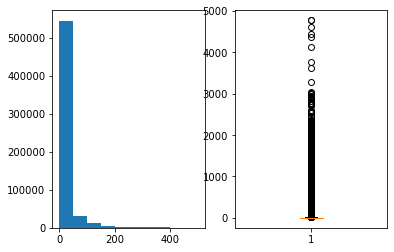

In [37]:
# ======================================================= All Permit Types
plt.subplot(1,2,1)
plt.hist(df['PROCESSING_TIME'],range=(0,500))
plt.subplot(1,2,2)
x = plt.boxplot(df['PROCESSING_TIME'])
df.describe()

# ===================== Outlier Analysis
q1 = np.percentile(df['PROCESSING_TIME'], 25, interpolation='midpoint')
q3 = np.percentile(df['PROCESSING_TIME'], 75, interpolation='midpoint')
iqr = q3 - q1
low_lim = q1 - 1.5*iqr
high_lim = q3 + 1.5*iqr
print('Our outliers are below ' + str(low_lim) + ', and above ' + str(high_lim))

df_nml = df[df['PROCESSING_TIME'] <= low_lim]
df_out = df[df['PROCESSING_TIME'] > high_lim]
pct_outlier = 100*len(df_out)/len(df)
print('Percentage of outliers in data: {:02.0f}%'.format(pct_outlier))
print('The number of outliers is: '+ str(len(df_out)))

This did not plot, maybe the data is too weird, we have negative numbers, most quartiles are 0 and mean is only 8.  Let's Investigate, I have 500 rows with nan, lets purge.

Here what we have is an IQR that is 8, very small and we get circles for the other data points.  Circles are outliers.

In [38]:
#x = df['REVIEW_TYPE'].to_list()
x = df['PERMIT_TYPE'].to_list()
xs = set(x)
print(xs)

{'PERMIT - EASY PERMIT PROCESS', 'PERMIT - ELEVATOR EQUIPMENT', 'PERMIT - WRECKING/DEMOLITION', 'PERMIT - ELECTRIC WIRING', 'PERMIT - RENOVATION/ALTERATION', 'PERMIT - FOR EXTENSION OF PMT', 'PERMIT - REINSTATE REVOKED PMT', 'PERMIT - NEW CONSTRUCTION', 'PERMIT - SCAFFOLDING', 'PERMIT - SIGNS', 'PERMIT - PORCH CONSTRUCTION'}


In [39]:
df_elev = df.loc[df['PERMIT_TYPE'] == 'PERMIT - ELEVATOR EQUIPMENT']
df_revoke = df.loc[df['PERMIT_TYPE'] == 'PERMIT - REINSTATE REVOKED PMT']
df_renov = df.loc[df['PERMIT_TYPE'] == 'PERMIT - RENOVATION/ALTERATION']
df_scaffold = df.loc[df['PERMIT_TYPE'] == 'PERMIT - SCAFFOLDING']
df_wire = df.loc[df['PERMIT_TYPE'] == 'PERMIT - ELECTRIC WIRING']
df_sign = df.loc[df['PERMIT_TYPE'] == 'PERMIT - SIGNS']
df_easy = df.loc[df['PERMIT_TYPE'] == 'PERMIT - EASY PERMIT PROCESS']
df_ext = df.loc[df['PERMIT_TYPE'] == 'PERMIT - FOR EXTENSION OF PMT']
df_demo = df.loc[df['PERMIT_TYPE'] == 'PERMIT - WRECKING/DEMOLITION']
df_newcon = df.loc[df['PERMIT_TYPE'] == 'PERMIT - NEW CONSTRUCTION']
#df_newcon.head()
df_porch = df.loc[df['PERMIT_TYPE'] == 'PERMIT - PORCH CONSTRUCTION']

Our outliers are below 0.0, and above 0.0
Percentage of outliers in data: 18%
The number of outliers is: 2605


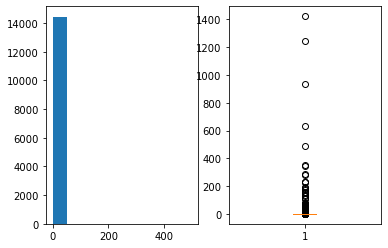

In [40]:
# ======================================================= Elevator Equipment
plt.subplot(1,2,1)
plt.hist(df_elev['PROCESSING_TIME'],range=(0,500))
plt.subplot(1,2,2)
x = plt.boxplot(df_elev['PROCESSING_TIME'])
df_elev.describe()

# ===================== Outlier Analysis
q1 = np.percentile(df_elev['PROCESSING_TIME'], 25, interpolation='midpoint')
q3 = np.percentile(df_elev['PROCESSING_TIME'], 75, interpolation='midpoint')
iqr = q3 - q1
low_lim = q1 - 1.5*iqr
high_lim = q3 + 1.5*iqr
print('Our outliers are below ' + str(low_lim) + ', and above ' + str(high_lim))

df_elev_nml = df_elev[df_elev['PROCESSING_TIME'] <= low_lim]
df_elev_out = df_elev[df_elev['PROCESSING_TIME'] > high_lim]
pct_outlier = 100*len(df_elev_out)/len(df_elev)
print('Percentage of outliers in data: {:02.0f}%'.format(pct_outlier))
print('The number of outliers is: '+ str(len(df_elev_out)))

       PROCESSING_TIME
count      3054.000000
mean          1.784545
std           8.096459
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         224.000000
Our outliers are below 0.0, and above 0.0
Percentage of outliers in data: 23%
The number of outliers is: 701


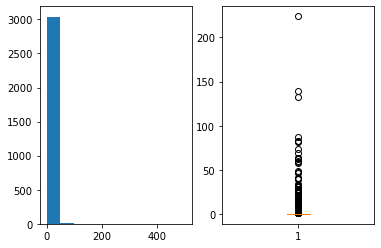

In [41]:
# ======================================================= Reinstate Revoked Permit
plt.subplot(1,2,1)
plt.hist(df_revoke['PROCESSING_TIME'],range=(0,500))
plt.subplot(1,2,2)
x = plt.boxplot(df_revoke['PROCESSING_TIME'])
print(df_revoke.describe())

# ===================== Outlier Analysis
q1 = np.percentile(df_revoke['PROCESSING_TIME'], 25, interpolation='midpoint')
q3 = np.percentile(df_revoke['PROCESSING_TIME'], 75, interpolation='midpoint')
iqr = q3 - q1
low_lim = q1 - 1.5*iqr
high_lim = q3 + 1.5*iqr
print('Our outliers are below ' + str(low_lim) + ', and above ' + str(high_lim))

df_revoke_nml = df_revoke[df_revoke['PROCESSING_TIME'] <= low_lim]
df_revoke_out = df_revoke[df_revoke['PROCESSING_TIME'] > high_lim]
pct_outlier = 100*len(df_revoke_out)/len(df_revoke)
print('Percentage of outliers in data: {:02.0f}%'.format(pct_outlier))
print('The number of outliers is: '+ str(len(df_revoke_out)))

       PROCESSING_TIME
count    122938.000000
mean         32.422929
std          64.014450
min           0.000000
25%           0.000000
50%           7.000000
75%          41.000000
max        1786.000000
Our outliers are below -61.5, and above 102.5
Percentage of outliers in data: 08%
The number of outliers is: 10150


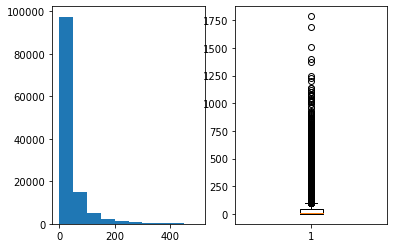

In [42]:
# ======================================================= Renovation / ALteration
plt.subplot(1,2,1)
plt.hist(df_renov['PROCESSING_TIME'],range=(0,500))
plt.subplot(1,2,2)
x = plt.boxplot(df_renov['PROCESSING_TIME'])
print(df_renov.describe())

# ===================== Outlier Analysis
q1 = np.percentile(df_renov['PROCESSING_TIME'], 25, interpolation='midpoint')
q3 = np.percentile(df_renov['PROCESSING_TIME'], 75, interpolation='midpoint')
iqr = q3 - q1
low_lim = q1 - 1.5*iqr
high_lim = q3 + 1.5*iqr
print('Our outliers are below ' + str(low_lim) + ', and above ' + str(high_lim))

df_renov_nml = df_renov[df_renov['PROCESSING_TIME'] <= low_lim]
df_renov_out = df_renov[df_renov['PROCESSING_TIME'] > high_lim]
pct_outlier = 100*len(df_renov_out)/len(df_renov)
print('Percentage of outliers in data: {:02.0f}%'.format(pct_outlier))
print('The number of outliers is: '+ str(len(df_renov_out)))

       PROCESSING_TIME
count      7593.000000
mean          0.277888
std           6.001884
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         455.000000
Our outliers are below 0.0, and above 0.0
Percentage of outliers in data: 04%
The number of outliers is: 331


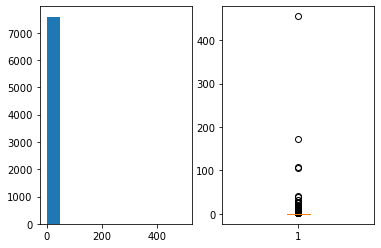

In [43]:
# ======================================================= Scaffolding
plt.subplot(1,2,1)
plt.hist(df_scaffold['PROCESSING_TIME'],range=(0,500))
plt.subplot(1,2,2)
x = plt.boxplot(df_scaffold['PROCESSING_TIME'])
print(df_scaffold.describe())

# ===================== Outlier Analysis
q1 = np.percentile(df_scaffold['PROCESSING_TIME'], 25, interpolation='midpoint')
q3 = np.percentile(df_scaffold['PROCESSING_TIME'], 75, interpolation='midpoint')
iqr = q3 - q1
low_lim = q1 - 1.5*iqr
high_lim = q3 + 1.5*iqr
print('Our outliers are below ' + str(low_lim) + ', and above ' + str(high_lim))

df_scaffold_nml = df_scaffold[df_scaffold['PROCESSING_TIME'] <= low_lim]
df_scaffold_out = df_scaffold[df_scaffold['PROCESSING_TIME'] > high_lim]
pct_outlier = 100*len(df_scaffold_out)/len(df_scaffold)
print('Percentage of outliers in data: {:02.0f}%'.format(pct_outlier))
print('The number of outliers is: '+ str(len(df_scaffold_out)))

       PROCESSING_TIME
count    214951.000000
mean         24.225717
std         153.048791
min           0.000000
25%           0.000000
50%           0.000000
75%           4.000000
max        4612.000000
Our outliers are below -6.0, and above 10.0
Percentage of outliers in data: 16%
The number of outliers is: 33813


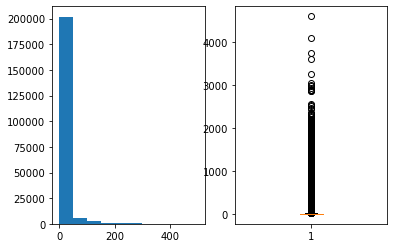

In [45]:
# ======================================================= Electric Wiring
plt.subplot(1,2,1)
plt.hist(df_wire['PROCESSING_TIME'],range=(0,500))
plt.subplot(1,2,2)
x = plt.boxplot(df_wire['PROCESSING_TIME'])
print(df_wire.describe())

# ===================== Outlier Analysis
q1 = np.percentile(df_wire['PROCESSING_TIME'], 25, interpolation='midpoint')
q3 = np.percentile(df_wire['PROCESSING_TIME'], 75, interpolation='midpoint')
iqr = q3 - q1
low_lim = q1 - 1.5*iqr
high_lim = q3 + 1.5*iqr
print('Our outliers are below ' + str(low_lim) + ', and above ' + str(high_lim))

df_wire_nml = df_wire[df_wire['PROCESSING_TIME'] <= low_lim]
df_wire_out = df_wire[df_wire['PROCESSING_TIME'] > high_lim]
pct_outlier = 100*len(df_wire_out)/len(df_wire)
print('Percentage of outliers in data: {:02.0f}%'.format(pct_outlier))
print('The number of outliers is: '+ str(len(df_wire_out)))

       PROCESSING_TIME
count     38419.000000
mean         75.726177
std         178.776540
min           0.000000
25%           6.000000
50%          14.000000
75%          79.000000
max        4770.000000
Our outliers are below -103.5, and above 188.5
Percentage of outliers in data: 10%
The number of outliers is: 3761


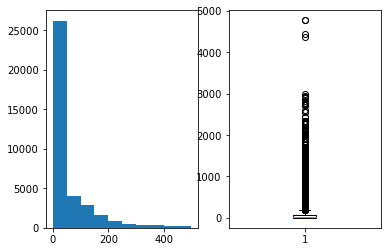

In [46]:
# ======================================================= Sign
plt.subplot(1,2,1)
plt.hist(df_sign['PROCESSING_TIME'],range=(0,500))
plt.subplot(1,2,2)
x = plt.boxplot(df_sign['PROCESSING_TIME'])
print(df_sign.describe())

# ===================== Outlier Analysis
q1 = np.percentile(df_sign['PROCESSING_TIME'], 25, interpolation='midpoint')
q3 = np.percentile(df_sign['PROCESSING_TIME'], 75, interpolation='midpoint')
iqr = q3 - q1
low_lim = q1 - 1.5*iqr
high_lim = q3 + 1.5*iqr
print('Our outliers are below ' + str(low_lim) + ', and above ' + str(high_lim))

df_sign_nml = df_sign[df_sign['PROCESSING_TIME'] <= low_lim]
df_sign_out = df_sign[df_sign['PROCESSING_TIME'] > high_lim]
pct_outlier = 100*len(df_sign_out)/len(df_sign)
print('Percentage of outliers in data: {:02.0f}%'.format(pct_outlier))
print('The number of outliers is: '+ str(len(df_sign_out)))

       PROCESSING_TIME
count    161671.000000
mean          1.136642
std          11.177387
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1303.000000
Our outliers are below 0.0, and above 0.0
Percentage of outliers in data: 09%
The number of outliers is: 15044


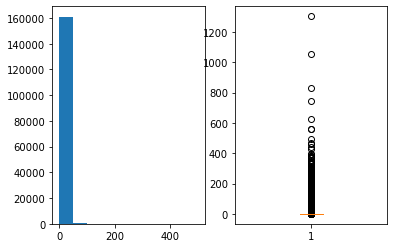

In [47]:
# ======================================================= Easy Permit Process
plt.subplot(1,2,1)
plt.hist(df_easy['PROCESSING_TIME'],range=(0,500))
plt.subplot(1,2,2)
x = plt.boxplot(df_easy['PROCESSING_TIME'])
print(df_easy.describe())

# ===================== Outlier Analysis
q1 = np.percentile(df_easy['PROCESSING_TIME'], 25, interpolation='midpoint')
q3 = np.percentile(df_easy['PROCESSING_TIME'], 75, interpolation='midpoint')
iqr = q3 - q1
low_lim = q1 - 1.5*iqr
high_lim = q3 + 1.5*iqr
print('Our outliers are below ' + str(low_lim) + ', and above ' + str(high_lim))

df_easy_nml = df_easy[df_easy['PROCESSING_TIME'] <= low_lim]
df_easy_out = df_easy[df_easy['PROCESSING_TIME'] > high_lim]
pct_outlier = 100*len(df_easy_out)/len(df_easy)
print('Percentage of outliers in data: {:02.0f}%'.format(pct_outlier))
print('The number of outliers is: '+ str(len(df_easy_out)))

,PROCESSING_TIME
count,58.000000
mean,2.103448
std,10.881643
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,76.000000


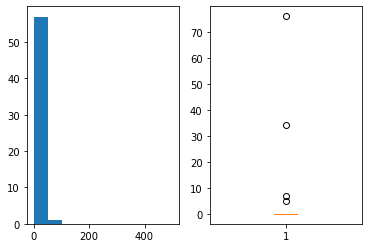

In [107]:
# ======================================================= For Extension of Pmt
plt.subplot(1,2,1)
plt.hist(df_ext['PROCESSING_TIME'],range=(0,500))
plt.subplot(1,2,2)
x = plt.boxplot(df_ext['PROCESSING_TIME'])
print(df_ext.describe())

# ===================== Outlier Analysis
q1 = np.percentile(df_ext['PROCESSING_TIME'], 25, interpolation='midpoint')
q3 = np.percentile(df_ext['PROCESSING_TIME'], 75, interpolation='midpoint')
iqr = q3 - q1
low_lim = q1 - 1.5*iqr
high_lim = q3 + 1.5*iqr
print('Our outliers are below ' + str(low_lim) + ', and above ' + str(high_lim))

df_ext_nml = df_ext[df_ext['PROCESSING_TIME'] <= low_lim]
df_ext_out = df_ext[df_ext['PROCESSING_TIME'] > high_lim]
pct_outlier = 100*len(df_ext_out)/len(df_ext)
print('Percentage of outliers in data: {:02.0f}%'.format(pct_outlier))
print('The number of outliers is: '+ str(len(df_ext_out)))

       PROCESSING_TIME
count     17138.000000
mean         32.971350
std          53.950821
min           0.000000
25%           0.000000
50%          17.000000
75%          42.000000
max        1248.000000
Our outliers are below -63.0, and above 105.0
Percentage of outliers in data: 06%
The number of outliers is: 1064


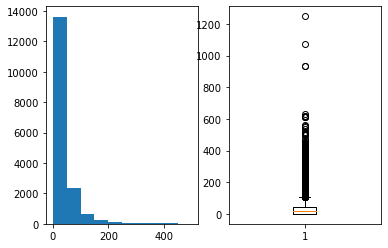

In [48]:
# ======================================================= Wrecking / Demolition
plt.subplot(1,2,1)
plt.hist(df_demo['PROCESSING_TIME'],range=(0,500))
plt.subplot(1,2,2)
x = plt.boxplot(df_demo['PROCESSING_TIME'])
print(df_demo.describe())

# ===================== Outlier Analysis
q1 = np.percentile(df_demo['PROCESSING_TIME'], 25, interpolation='midpoint')
q3 = np.percentile(df_demo['PROCESSING_TIME'], 75, interpolation='midpoint')
iqr = q3 - q1
low_lim = q1 - 1.5*iqr
high_lim = q3 + 1.5*iqr
print('Our outliers are below ' + str(low_lim) + ', and above ' + str(high_lim))

df_demo_nml = df_demo[df_demo['PROCESSING_TIME'] <= low_lim]
df_demo_out = df_demo[df_demo['PROCESSING_TIME'] > high_lim]
pct_outlier = 100*len(df_demo_out)/len(df_demo)
print('Percentage of outliers in data: {:02.0f}%'.format(pct_outlier))
print('The number of outliers is: '+ str(len(df_demo_out)))

       PROCESSING_TIME
count     22415.000000
mean         37.926299
std          74.321054
min           0.000000
25%           0.000000
50%           8.000000
75%          45.000000
max        1421.000000
Our outliers are below -67.5, and above 112.5
Percentage of outliers in data: 10%
The number of outliers is: 2181


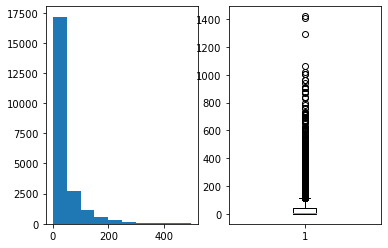

In [49]:
# ======================================================= New Construction
plt.subplot(1,2,1)
plt.hist(df_newcon['PROCESSING_TIME'],range=(0,500))
plt.subplot(1,2,2)
x = plt.boxplot(df_newcon['PROCESSING_TIME'])
print(df_newcon.describe())

# ===================== Outlier Analysis
q1 = np.percentile(df_newcon['PROCESSING_TIME'], 25, interpolation='midpoint')
q3 = np.percentile(df_newcon['PROCESSING_TIME'], 75, interpolation='midpoint')
iqr = q3 - q1
low_lim = q1 - 1.5*iqr
high_lim = q3 + 1.5*iqr
print('Our outliers are below ' + str(low_lim) + ', and above ' + str(high_lim))

df_newcon_nml = df_newcon[df_newcon['PROCESSING_TIME'] <= low_lim]
df_newcon_out = df_newcon[df_newcon['PROCESSING_TIME'] > high_lim]
pct_outlier = 100*len(df_newcon_out)/len(df_newcon)
print('Percentage of outliers in data: {:02.0f}%'.format(pct_outlier))
print('The number of outliers is: '+ str(len(df_newcon_out)))

       PROCESSING_TIME
count      3093.000000
mean         20.266731
std          48.395274
min           0.000000
25%           0.000000
50%           5.000000
75%          16.000000
max         556.000000
Our outliers are below -24.0, and above 40.0
Percentage of outliers in data: 13%
The number of outliers is: 412


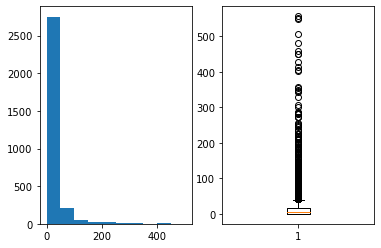

In [50]:
# ======================================================= Porch Construction
plt.subplot(1,2,1)
plt.hist(df_porch['PROCESSING_TIME'],range=(0,500))
plt.subplot(1,2,2)
x = plt.boxplot(df_porch['PROCESSING_TIME'])
print(df_porch.describe())

# ===================== Outlier Analysis
q1 = np.percentile(df_porch['PROCESSING_TIME'], 25, interpolation='midpoint')
q3 = np.percentile(df_porch['PROCESSING_TIME'], 75, interpolation='midpoint')
iqr = q3 - q1
low_lim = q1 - 1.5*iqr
high_lim = q3 + 1.5*iqr
print('Our outliers are below ' + str(low_lim) + ', and above ' + str(high_lim))

df_porch_nml = df_porch[df_porch['PROCESSING_TIME'] <= low_lim]
df_porch_out = df_porch[df_porch['PROCESSING_TIME'] > high_lim]
pct_outlier = 100*len(df_porch_out)/len(df_porch)
print('Percentage of outliers in data: {:02.0f}%'.format(pct_outlier))
print('The number of outliers is: '+ str(len(df_porch_out)))

Do these plots make sense?  I Feels like there are alot of outliers

I would like to know the percentage of outliers to the total data points.  First I should do this exercise for the other types of building permits.

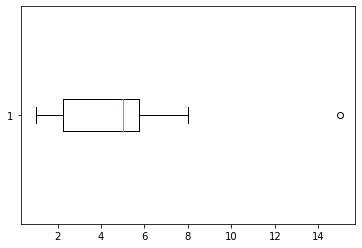

In [51]:
#==============================================================================   Simple Examples to start from.
t = plt.boxplot([1,2,2,15,3,4,5,5,5,5,6,8,7,1],vert=False)

In [52]:
T = pd.Series(index=range(14), data=[1,2,2,15,3,4,5,5,5,5,6,8,7,1])
T.describe()

count    14.000000
mean      4.928571
std       3.604789
min       1.000000
25%       2.250000
50%       5.000000
75%       5.750000
max      15.000000
dtype: float64